<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Libraries" data-toc-modified-id="Libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Libraries</a></span></li><li><span><a href="#Initializing-data" data-toc-modified-id="Initializing-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Initializing data</a></span></li><li><span><a href="#Getting-a-feel-with-plots" data-toc-modified-id="Getting-a-feel-with-plots-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Getting a feel with plots</a></span></li><li><span><a href="#Using-sympy-to-evaluate-the-integral" data-toc-modified-id="Using-sympy-to-evaluate-the-integral-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Using sympy to evaluate the integral</a></span></li><li><span><a href="#MCMC-Hammer-(emcee)" data-toc-modified-id="MCMC-Hammer-(emcee)-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>MCMC Hammer (emcee)</a></span><ul class="toc-item"><li><span><a href="#Log-prior" data-toc-modified-id="Log-prior-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Log prior</a></span></li><li><span><a href="#Log-likelihood-function" data-toc-modified-id="Log-likelihood-function-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Log likelihood function</a></span></li><li><span><a href="#Log-probability-function" data-toc-modified-id="Log-probability-function-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Log probability function</a></span></li><li><span><a href="#Maximum-likelihood-parameter-estimation" data-toc-modified-id="Maximum-likelihood-parameter-estimation-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Maximum likelihood parameter estimation</a></span></li><li><span><a href="#Run-emcee" data-toc-modified-id="Run-emcee-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Run emcee</a></span></li><li><span><a href="#Corner-plot" data-toc-modified-id="Corner-plot-5.6"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>Corner plot</a></span></li><li><span><a href="#Projection" data-toc-modified-id="Projection-5.7"><span class="toc-item-num">5.7&nbsp;&nbsp;</span>Projection</a></span></li></ul></li><li><span><a href="#Final-numbers" data-toc-modified-id="Final-numbers-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Final numbers</a></span></li><li><span><a href="#Testing-blocks" data-toc-modified-id="Testing-blocks-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Testing blocks</a></span></li></ul></div>

# Parameter estimation with emcee 

## Libraries

In [1]:
import os.path
import sys 
print("Python %s.%s.%s"%sys.version_info[:3])
import scipy.stats
import emcee
print("emcee version", emcee.__version__)
from IPython.display import display, HTML
import numpy as np
%config InlineBackend.figure_format ='retina'
print(os.getcwd() + "\n")

from matplotlib import pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from jupyterthemes import jtplot
jtplot.style(theme='monokai')
jtplot.style(ticks = True, grid = False, figsize = (10,8))

Python 3.6.4
emcee version 3.0rc2
/Users/Isabel/Documents/emcee



## Initializing data 

Data created from the following function, 

\begin{equation*}
y(x1,x2) = \int^{x1}_0 \textrm{sin}(A\zeta + Bx_2)(C\zeta^2 + ln(Dx_2)) d\zeta.
\end{equation*}

The given dataset contains data for $x1$, $x2$, $y$, and $\sigma_y$ (the standard error in y). Guesses for the four parameters are obtained using a random number between zero and five. 

In [2]:
#import data
data = np.loadtxt( '/Users/Isabel/Documents/emcee/fake2.dat' )

In [3]:
var1 = data[0:,0]
var2 = data[0:,1]
var3 = data[0:,2]
var4 = data[0:,3]

x1 = np.copy(var1)
x2 = np.copy(var2)
y = np.copy(var3)
yerr = np.copy(var4)

a_approx = np.random.uniform(0,5) #np.random.randint(1,5) #1 np.random.uniform(0,5)
b_approx = np.random.uniform(0,5) #np.random.randint(1,5) #1 np.random.uniform(0,5)
c_approx = np.random.uniform(0,5)#np.random.randint(1,5) #1 np.random.uniform(0,5)
d_approx = np.random.uniform(0,5)#np.random.randint(1,5) #4 np.random.uniform(0,5)

print("Guesses:")
print("a = {0:0.3f}".format(a_approx))
print("b = {0:0.3f}".format(b_approx))
print("c = {0:0.3f}".format(c_approx)) 
print("d = {0:0.3f}".format(d_approx)) 

Guesses:
a = 0.523
b = 0.102
c = 2.821
d = 3.911


## Getting a feel with plots

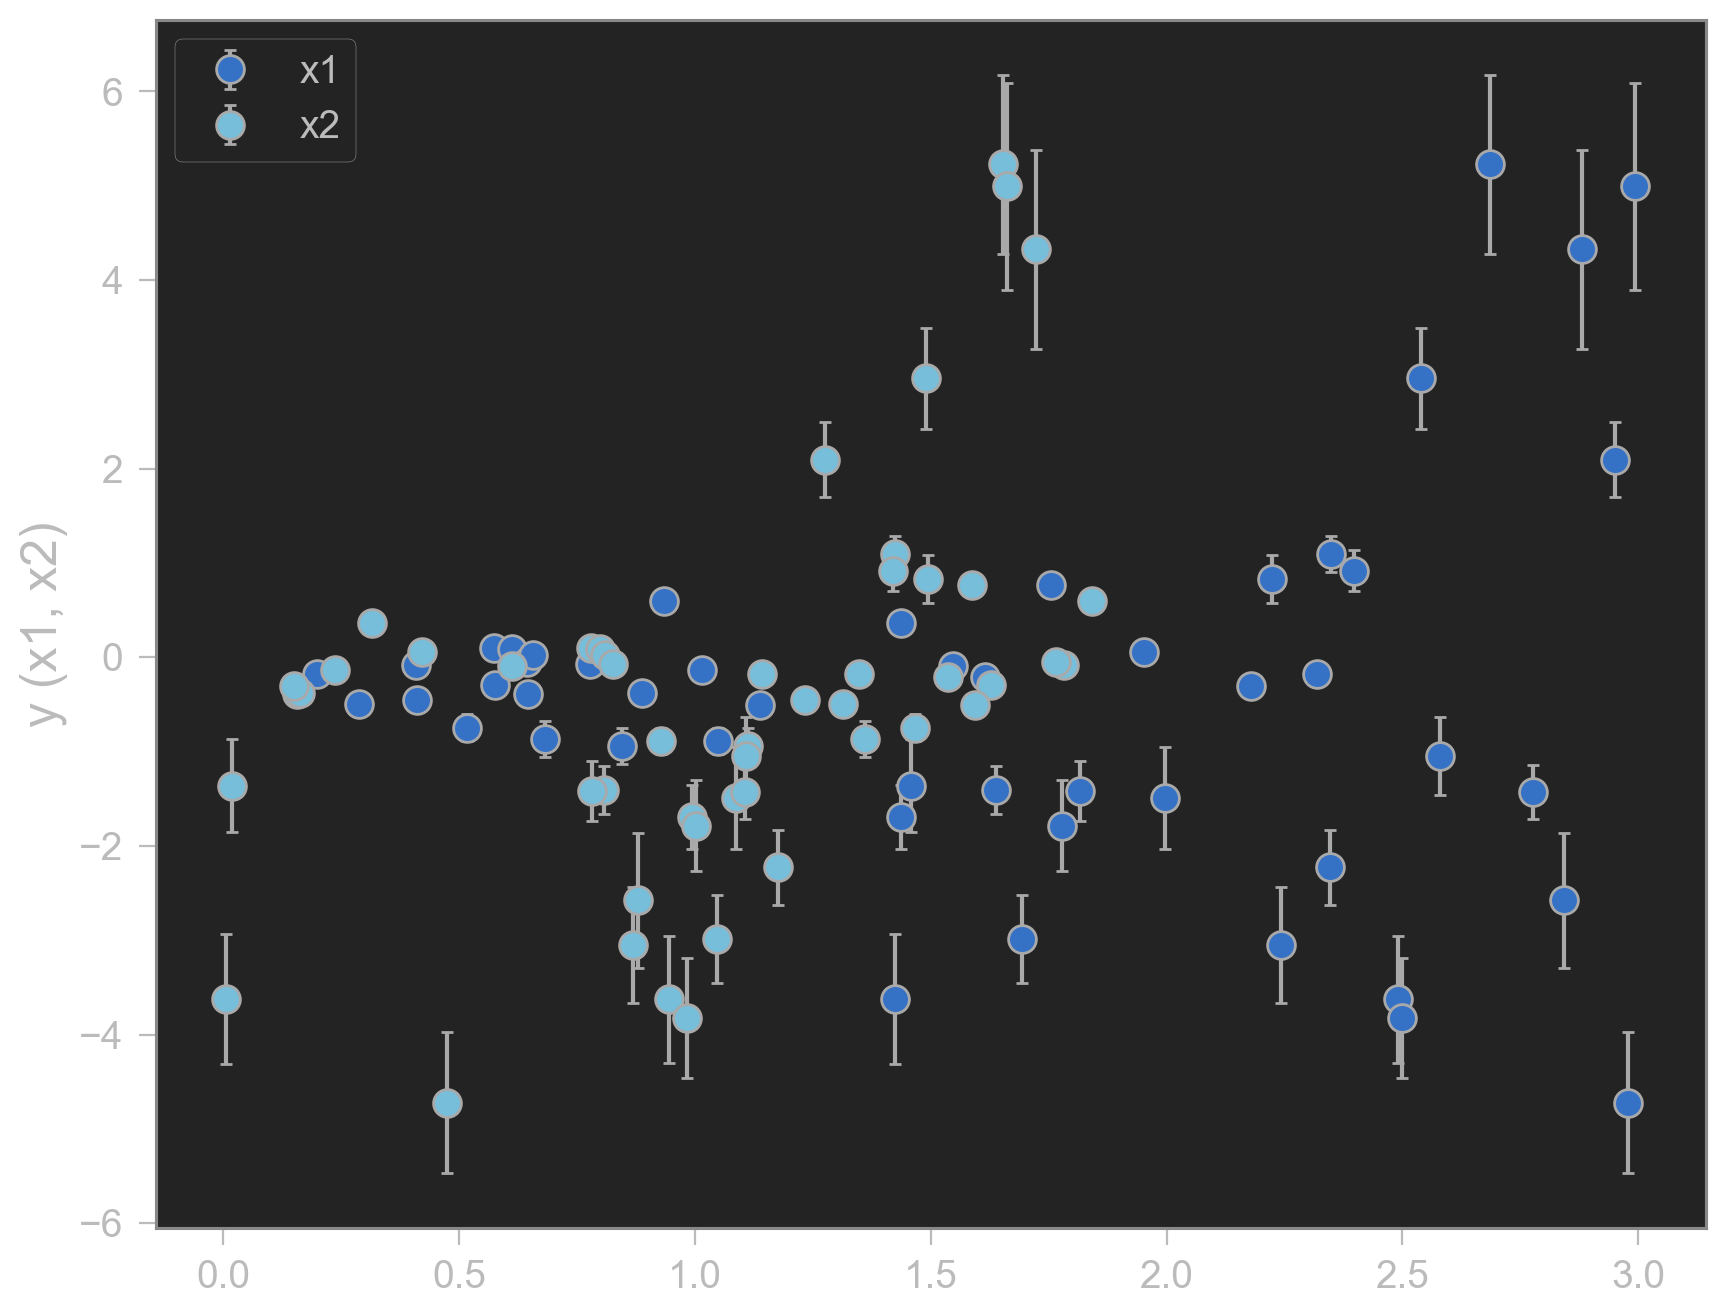

In [4]:
plt.figure(figsize=(10,8), dpi = 100)
plt.errorbar(x1,y,yerr=yerr, fmt=".b", markersize = 20, markeredgecolor = 'darkgrey', ecolor='darkgrey', capsize=2, elinewidth=1.5, markeredgewidth=1, alpha = 1)
plt.errorbar(x2,y,yerr=yerr, fmt=".c", markersize = 20, markeredgecolor = 'darkgrey', ecolor='darkgrey', capsize=2, elinewidth=1.5, markeredgewidth=1)

plt.legend(["x1", "x2"], fontsize=14)
plt.ylabel("y (x1, x2)", fontsize= 18, rotation = 90)
plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14, rotation=0)
plt.show()

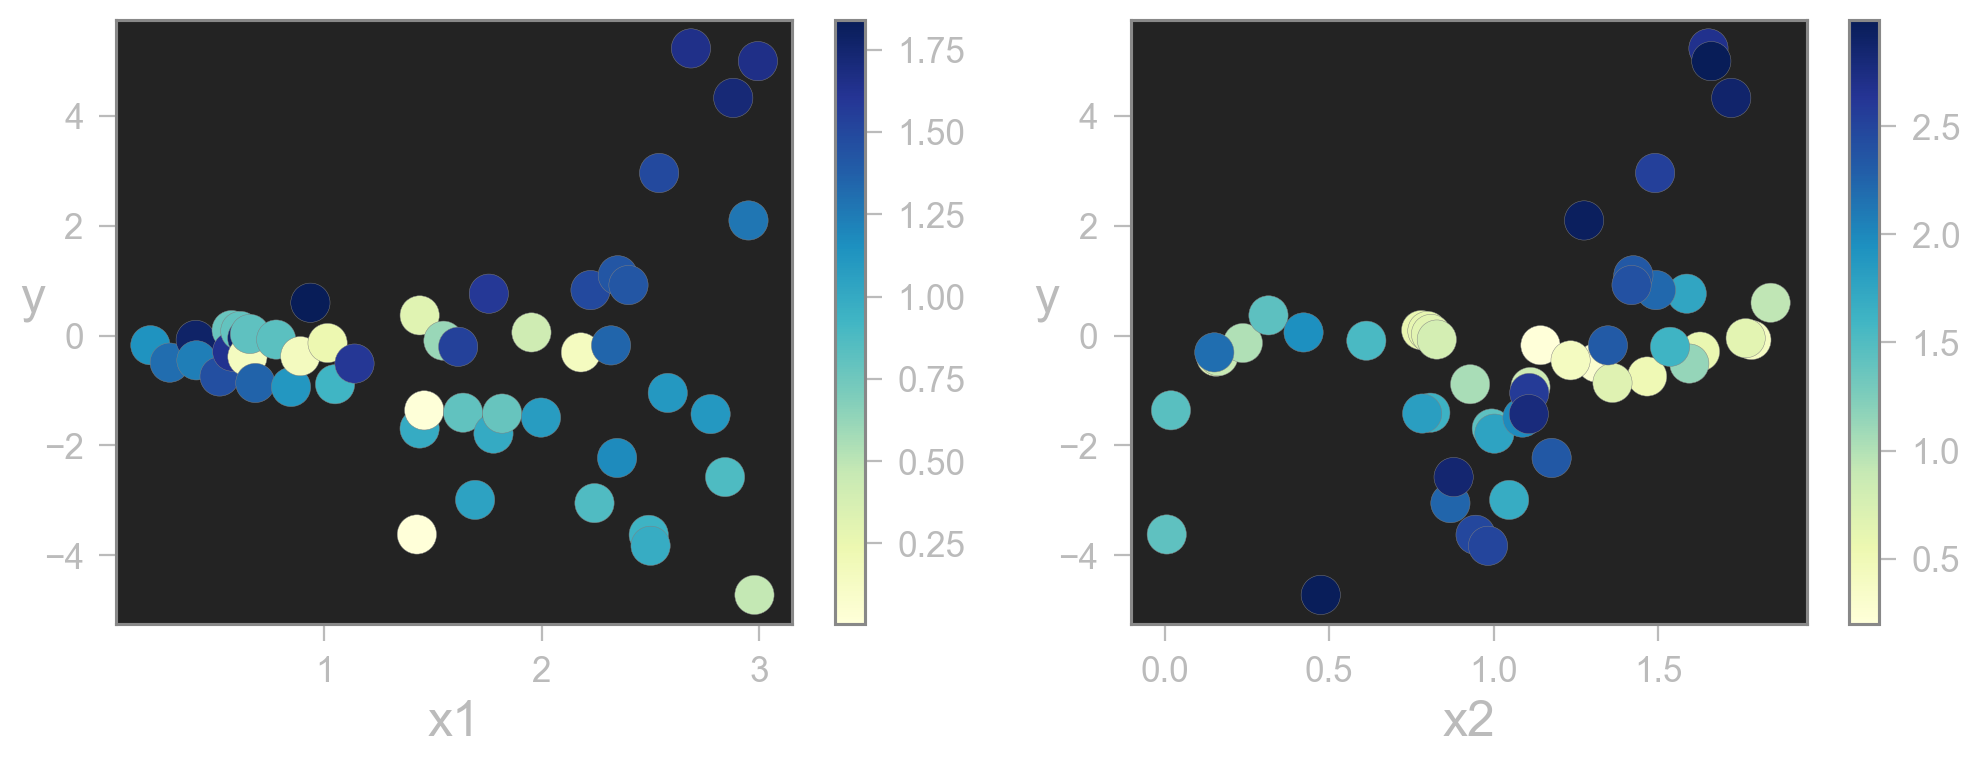

In [5]:
cm = plt.cm.get_cmap('YlGnBu')
plt.figure(figsize=(12,4), dpi = 100)
plt.subplot(1,2,1)
plt.scatter(x1, y, c=x2, s=200, marker='o', edgecolor = 'gray', cmap=cm)
plt.colorbar()
plt.xlabel('x1', fontsize = 18)
plt.ylabel('y', fontsize = 18, rotation = 0)

plt.subplot(1,2,2)
plt.scatter(x2, y, c=x1, s=200, marker='o', edgecolor = 'gray', cmap=cm)
plt.colorbar()
plt.xlabel('x2', fontsize = 18)
plt.ylabel('y', fontsize = 18, rotation = 0)

plt.show()

## Using sympy to evaluate the integral 

Sympy enables the user to evaluate an integral symbolically, then turn it into a numpy function which can then be used by the emcee module. 

In [6]:
import sympy as sym

x1, x2, a, b, c, d, x = sym.symbols('x1, x2, a, b, c, d, x')
f = sym.sin(a*x + b * x2) * (c*x**2 + sym.ln(d*x2))  
yx1x2 = sym.integrate(f, (x, 0, x1))  
 
f_mod = sym.lambdify( (x1, x2, a, b, c, d, x), yx1x2, 'numpy')

## MCMC Hammer (emcee)

### Log prior

In [7]:
def log_prior(theta): 
    a, b, c, d = theta
    if (-1.0 < a < 10.0 and -1.0 < b < 10.0 and \
        -1.0 < c < 10.0 and -1.0 < d < 10.0):
    #if 0.0 < a < 5.0 and 0.0 < b < 5.0 and 0.0 < c < 5.0 and 0.0 < d < 5.0: 
        return 0.0
    return -np.inf

### Log likelihood function

In [8]:
def log_likelihood(theta, x1, x2, y, yerr, f_mod): 
    a, b, c, d = theta
    model =  f_mod
    return -0.5 * np.sum(((y-model(x1, x2, a ,b, c, d, x))**2/yerr**2))

### Log probability function

In [9]:
def log_probability(theta, x1, x2, y, yerr):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, x1, x2, y, yerr, f_mod)

### Maximum likelihood parameter estimation

Using the basinhopping algorithm along with the L-BFGS-B method to find global minimum of the log likelihood function (i.e., maximum likelihood).  

In [10]:
import emcee 
from scipy.optimize import minimize
from scipy.optimize import basinhopping

x1 = np.copy(var1)
x2 = np.copy(var2)
y = np.copy(var3)
yerr = np.copy(var4)
initial = np.array([a_approx, b_approx, c_approx, d_approx]) + 2* np.random.randn(4)
n11 = lambda *args: -log_likelihood(*args)
bounds = ((0.5,5), (0.5,5), (0.5,5), (0.5,5))
#soln = minimize(n11, initial, args=(x1, x2, y, yerr, f_mod), method = 'Nelder-Mead', tol = 1e-8)
minimizer_kwargs = dict(method="L-BFGS-B", args = (x1, x2, y, yerr, f_mod), bounds = bounds, tol = 1e-4)
soln = basinhopping(n11, initial, T= 5, stepsize =0.9, niter = 500, 
                    minimizer_kwargs=minimizer_kwargs) 
print(soln)

a_ml, b_ml, c_ml, d_ml = soln.x

                        fun: 24.46930418798739
 lowest_optimization_result:       fun: 24.46930418798739
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>
      jac: array([-2.3312154 , -0.98646531, -0.15035297,  0.1519755 ])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 125
      nit: 20
   status: 0
  success: True
        x: array([ 1.25398658,  3.29815559,  0.53816883,  3.02384167])
                    message: ['requested number of basinhopping iterations completed successfully']
      minimization_failures: 0
                       nfev: 30470
                        nit: 500
                          x: array([ 1.25398658,  3.29815559,  0.53816883,  3.02384167])


### Run emcee

Initializing walkers in a Gaussian ball around ML estimates.

In [11]:
pos = soln.x + 1e-2 * np.random.randn(300,4)
nwalkers, ndim = pos.shape
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=(x1, x2, y, yerr))
sampler.run_mcmc(pos, 5000)

State([[ 1.22622121  3.30803469  0.59588099  2.90236911]
 [ 1.2647914   3.29440994  0.50211363  3.1565114 ]
 [ 1.25159227  3.30222215  0.53185687  3.01003706]
 ..., 
 [ 1.25278278  3.298984    0.55833669  2.97160839]
 [ 1.25749654  3.29306795  0.53804891  3.06473226]
 [ 1.26207807  3.29887965  0.51760996  3.08142079]], log_prob=[-28.71710405 -27.92646621 -24.96419403 -26.30781374 -29.03034277
 -26.15792476 -25.22781581 -26.63502082 -27.16322956 -25.96809149
 -26.8511592  -31.71261491 -25.78705145 -27.12126054 -26.30093014
 -27.03795045 -27.32051937 -24.68937871 -26.00387335 -26.4594664
 -27.73918827 -26.12536182 -26.63505003 -27.74861582 -26.64703897
 -25.99101562 -25.39542593 -28.14678221 -28.94670282 -27.56397575
 -25.36941342 -26.70807071 -26.42011401 -26.091961   -26.52414935
 -25.07228327 -28.09380484 -26.45755448 -26.46971478 -26.24576535
 -28.66098048 -26.94143663 -25.40639546 -25.30054922 -26.4086864
 -25.10767555 -26.25520462 -25.18660403 -25.64495725 -26.36569306
 -26.2578721

### Corner plot

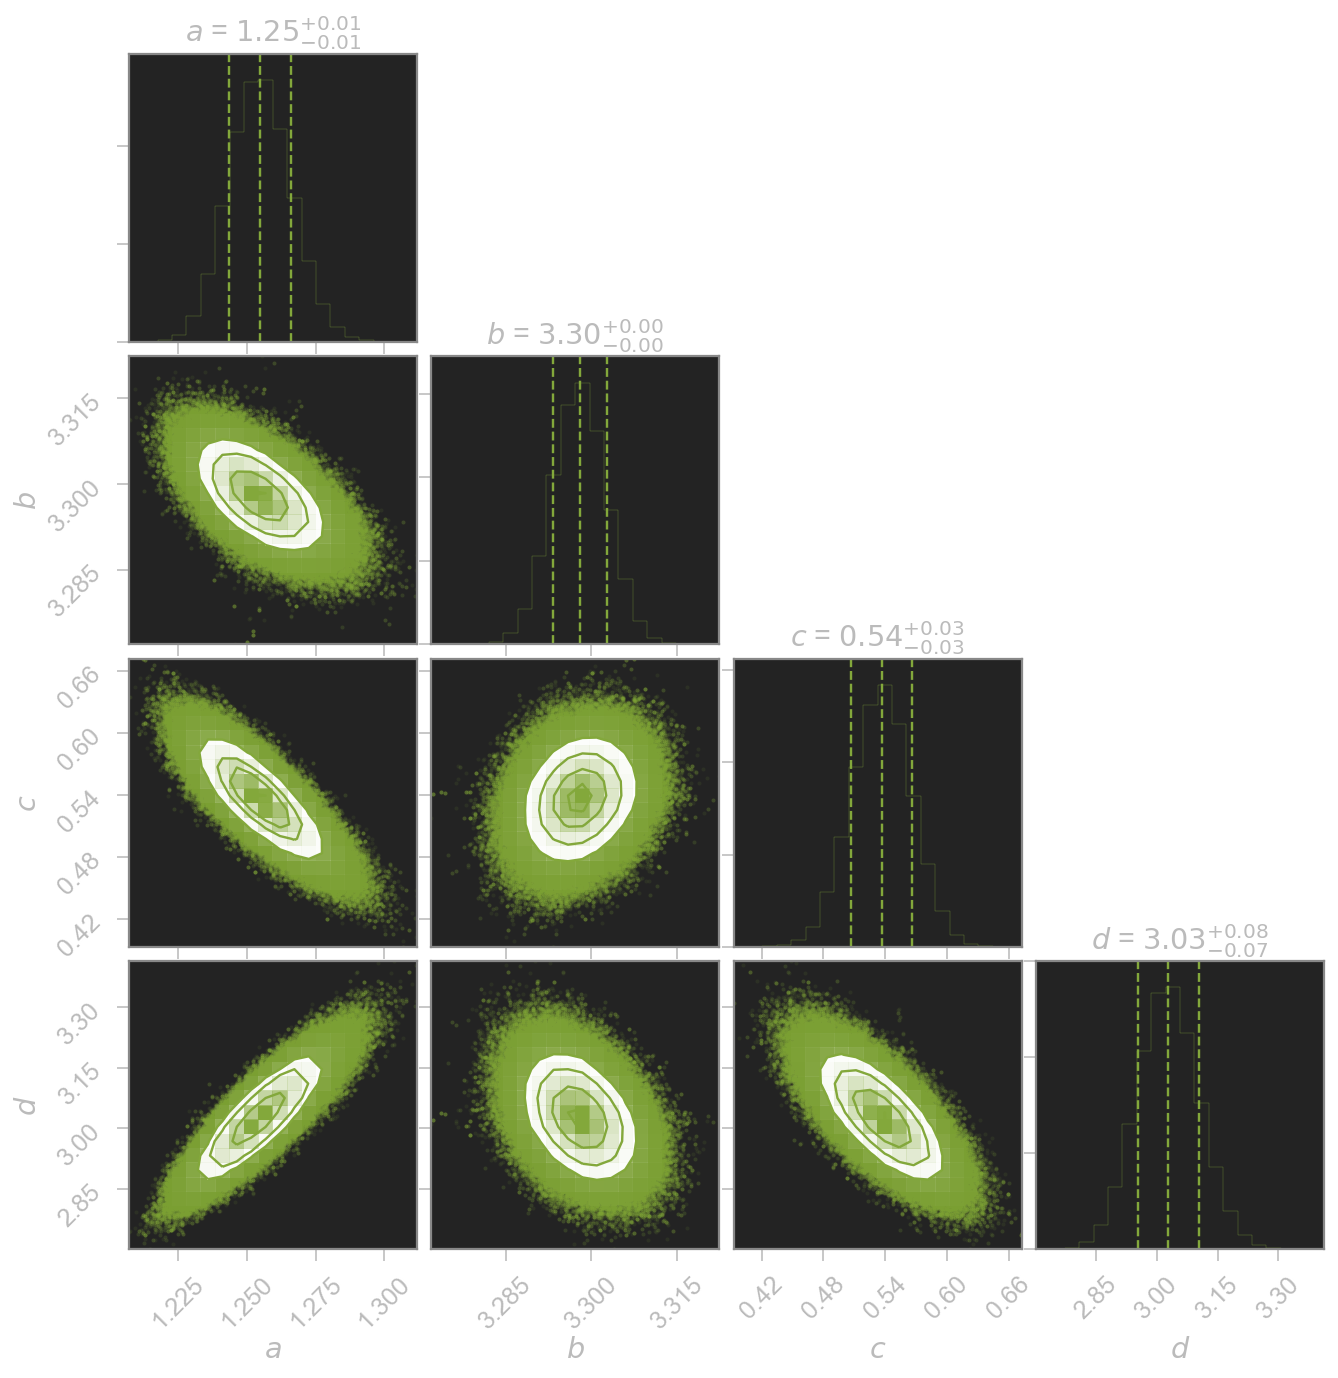

In [12]:
samples = sampler.chain[:, :, :].reshape((-1,ndim))

import corner
fig = corner.corner(samples, labels=["$a$", "$b$", "$c$", "$d$","$\ln\,f$"], color = 'g', 
                    quantiles=[0.16, 0.5, 0.84], show_titles=True, figsize=(10,10))
fig.savefig("triangle.png")

### Projection

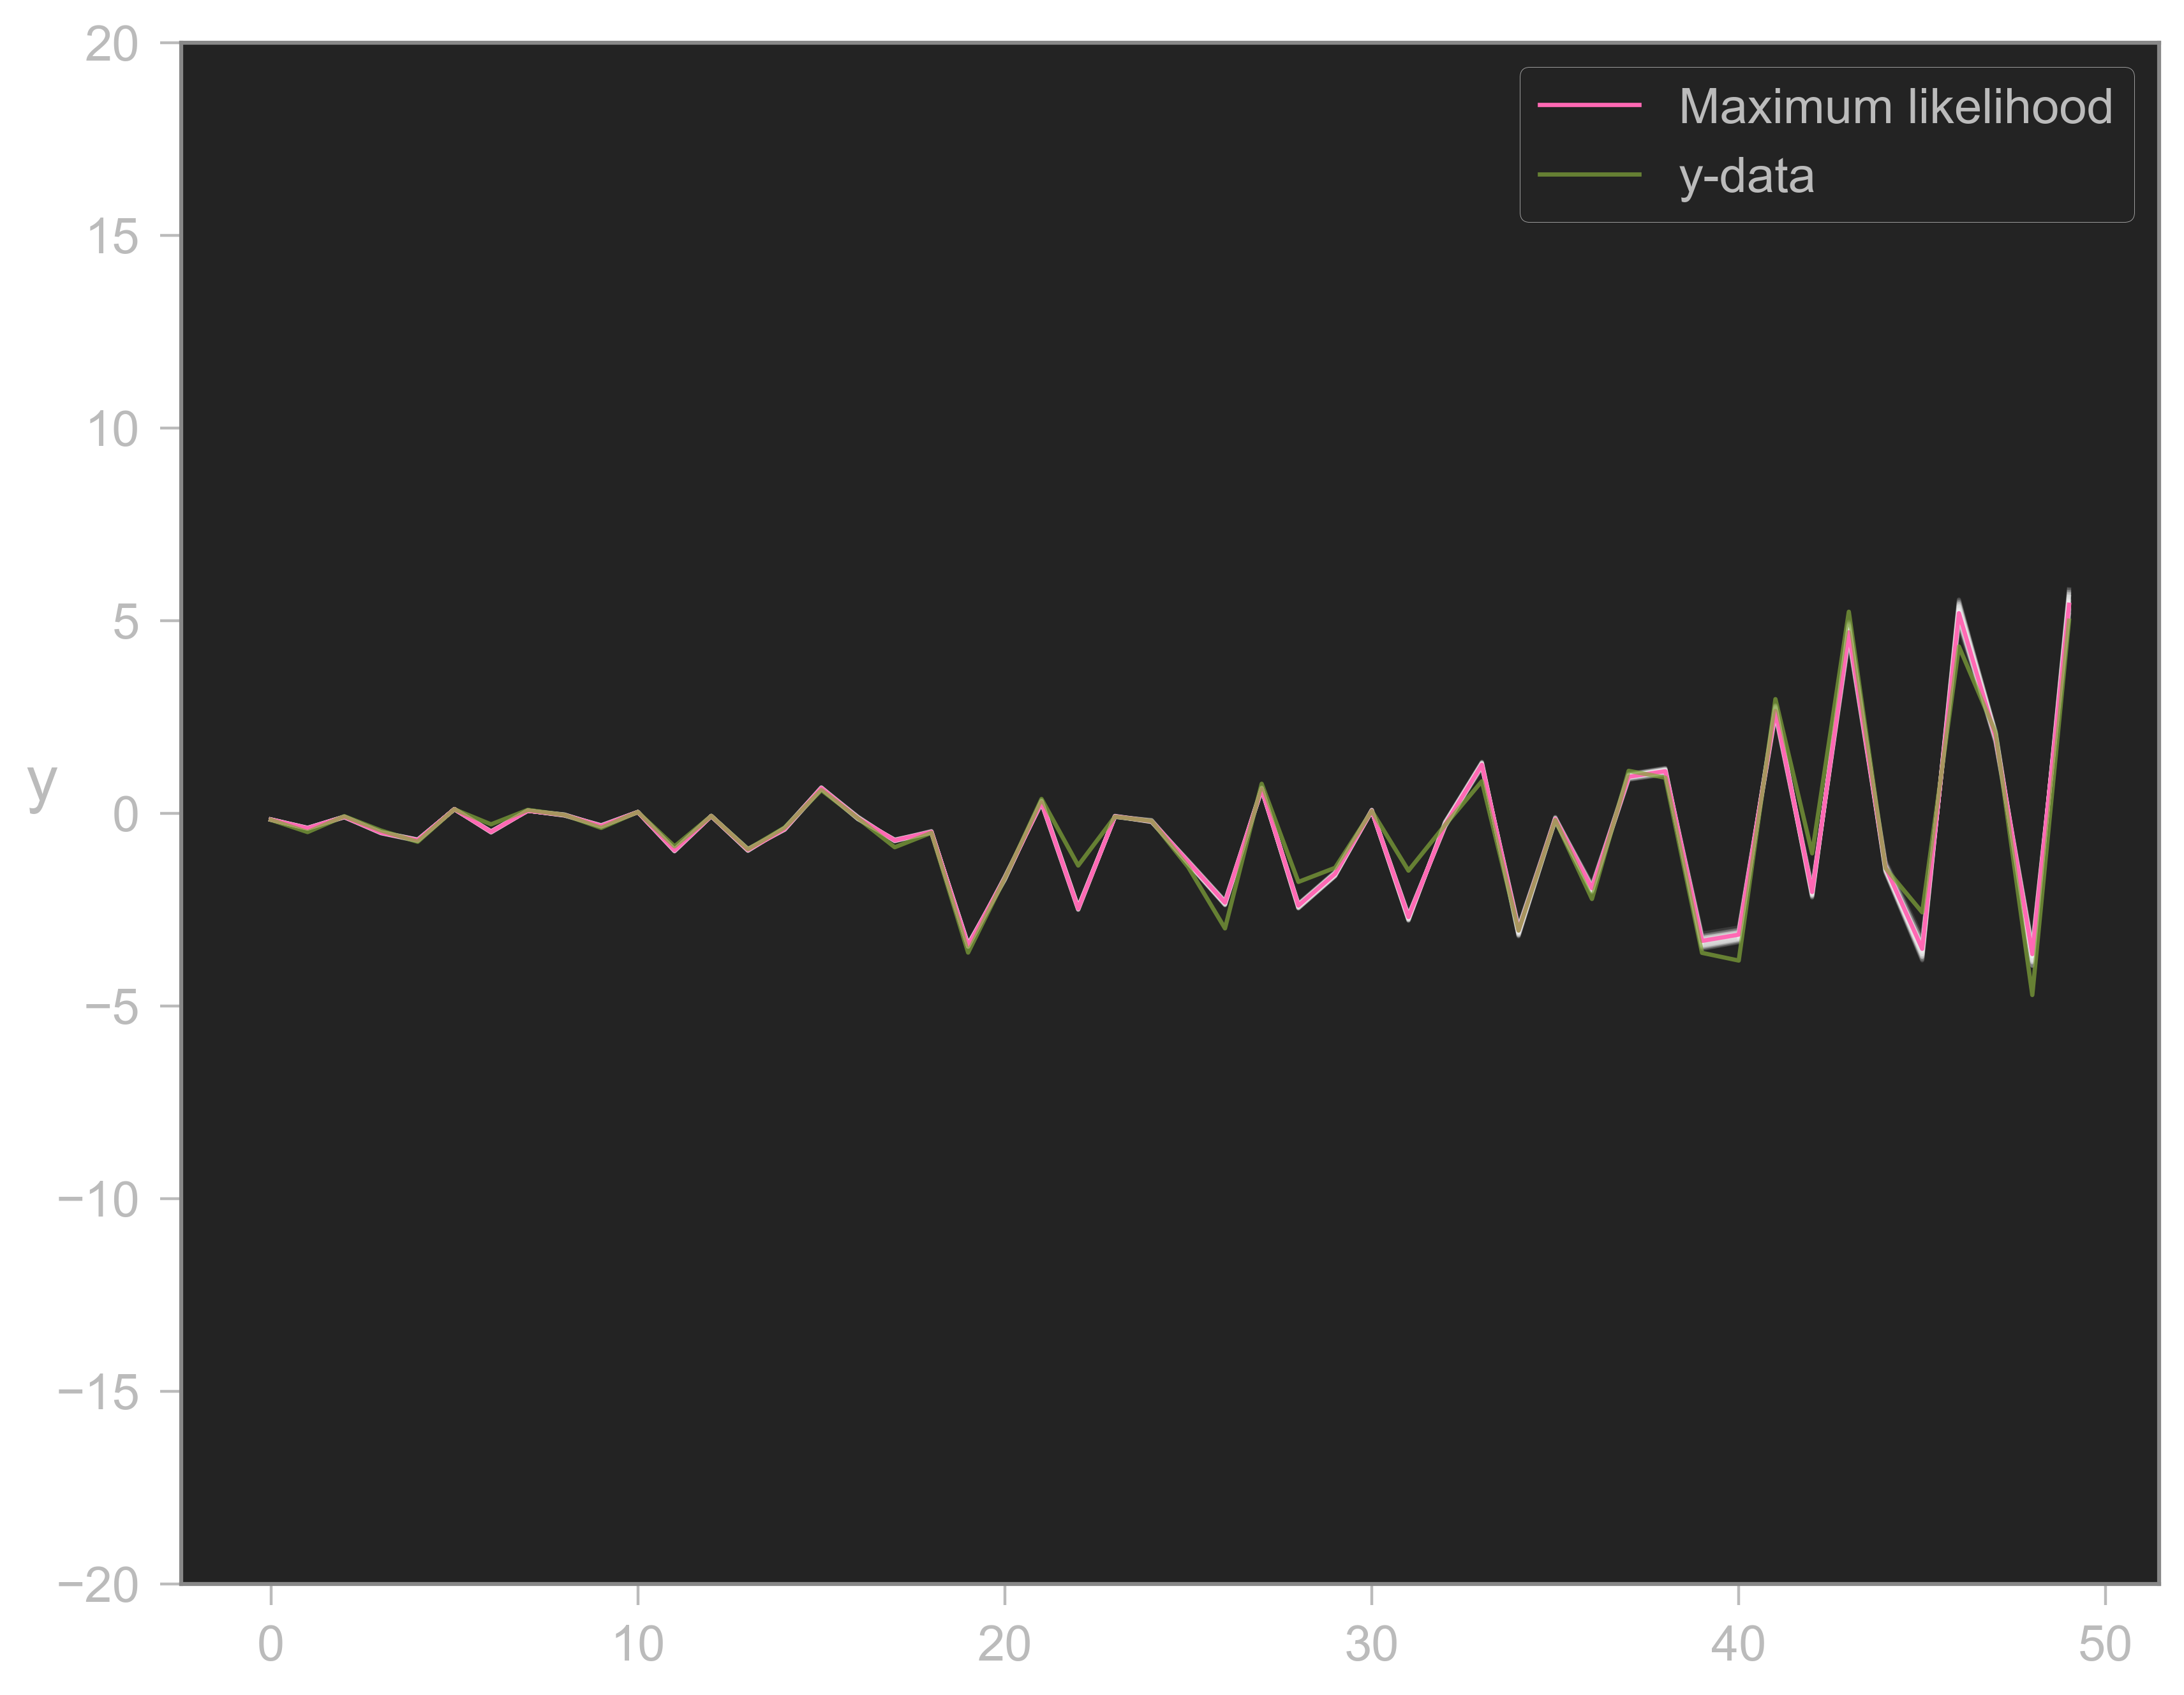

In [21]:
a_list = []
b_list = []
c_list = []
d_list = []

for a, b, c, d in samples[np.random.randint(len(samples), size=100)]:
    a_list.append(a)
    b_list.append(b)
    c_list.append(c)
    d_list.append(d)

plt.figure(figsize=(10,8), dpi = 200)
for i in range(len(x1)): 
    plt.plot(f_mod(x1, x2, a_list[i],b_list[i],c_list[i],d_list[i], x), color="white", alpha=0.1)

plt.plot(f_mod(x1, x2, a_ml,b_ml, c_ml, d_ml, x), "hotpink", label="Maximum likelihood")
plt.plot(y, 'g',  label="y-data", alpha = 0.7)
plt.legend(fontsize=14)
plt.ylabel("y", fontsize= 18, rotation =0)
plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14, rotation=0)
plt.ylim(-20,20)
plt.show()

## Final numbers

In [14]:
#samples[:,2] = np.exp(samples[:,2])

a_mcmc, b_mcmc, c_mcmc, d_mcmc = map(lambda v: (v[1], v[2]-v[1], v[1]-v[0]), zip(*np.percentile(samples, [16, 50, 84], axis=0)))

In [15]:
print("MCMC estimates:")
print("a = ",a_mcmc[0], ",", "+", a_mcmc[1], ",", "-", a_mcmc[2]) 
print("b = ",b_mcmc[0], ",", "+", b_mcmc[1], ",", "-", b_mcmc[2]) 
print("c = ",c_mcmc[0], ",", "+", c_mcmc[1], ",", "-", c_mcmc[2]) 
print("d = ",d_mcmc[0], ",", "+", d_mcmc[1], ",", "-", d_mcmc[2]) 
print("---------------------")
print("Initial guesses:")
print("a = {0:0.3f}".format(a_approx))
print("b = {0:0.3f}".format(b_approx))
print("c = {0:0.3f}".format(c_approx)) 
print("d = {0:0.3f}".format(d_approx)) 
print("---------------------")
print("Maximum likelihood estimates:")
print("a = {0:0.3f}".format(a_ml))
print("b = {0:0.3f}".format(b_ml))
print("c = {0:0.3f}".format(c_ml)) 
print("d = {0:0.3f}".format(d_ml)) 


MCMC estimates:
a =  1.25473581861 , + 0.0115219003126 , - 0.0110953604645
b =  3.29792299421 , + 0.00475881234132 , - 0.00472192233403
c =  0.536544659092 , + 0.0289240507316 , - 0.0293888631791
d =  3.02742397861 , + 0.0769326401242 , - 0.0749725814931
---------------------
Initial guesses:
a = 0.523
b = 0.102
c = 2.821
d = 3.911
---------------------
Maximum likelihood estimates:
a = 1.254
b = 3.298
c = 0.538
d = 3.024


## Testing blocks

In [16]:
#import sys
#np.set_printoptions(threshold=sys.maxsize)
#print(np.log(samples[:,2]))
#plt.plot(np.log(samples[:,2]))

In [17]:
#fig, ax = plt.subplots(figsize=(10,8), dpi = 100)
#cm = plt.cm.get_cmap('YlGnBu')
#scat = ax.scatter(x1, x2, c=y, s=200, marker='o', edgecolor = 'gray', cmap=cm)
#cb = plt.colorbar(scat)
#cb.set_label('y(x1,x2)', fontsize = 18)
#plt.xlabel('x1', fontsize = 18)
#plt.ylabel('x2', fontsize = 18, rotation = 90)
#plt.show()

In [18]:
#from mpl_toolkits.mplot3d import Axes3D 
#
#fig = plt.figure(figsize=(10,8))
#ax = fig.add_subplot(111, projection='3d')
#ax.scatter(x1, x2, y)
#plt.show()

In [19]:
test= 2*np.random.randn(4)
test

array([ 4.38758441,  0.47898758,  1.92565423, -1.15593794])